Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name below:

In [ ]:
NAME = "Munzir H. Abdulmajid"

---

In [2]:
from numpy.testing import assert_, assert_raises, assert_allclose
import numpy as np #import numpy as usual
from numpy import linalg as LA #import linear algebra package for norms, etc.
import matplotlib.pyplot as plt #import plotting package

ME 535 Winter 2021

# Homework 4

The models used by engineers often involve linear differential equations. A familiar example is the damped linear (or harmonic) oscillator: $$\frac{d^2 y}{dt^2} + c \frac{dy}{dt} + x = 0$$. Linear equations are "friendly" because we can solve them analytically and they support superposition. However, the "real world" is not that friendly; most systems are actually nonlinear and we typically cannot write down analytic solutions. Instead, we often employ numerical methods to compute approximate solutions for more realistic systems modeled by nonlinear differential equations. The first few problems in this homework deal with a classic nonlinear second-order ODE, the van der Pol equation, which describes an oscillator with nonlinear damping:
$$\frac{d^2 y}{dt^2} -\epsilon(1-x^2) \frac{dy}{dt} + x = 0$$

For questions 1 and 2, set the parameter value to $\epsilon = 0.1$ and use your own implementation of 4th order Runge Kutta to produce the necessary numerical solutions.

1. Like the linear oscillator, the van der Pol oscillator has an equilibrium solution $y(t)\equiv 0$. Start by considering the stability of the equilibrium.

For the linear oscillator, there are 3 possibilities 

i) For positive damping ($c>0$), the equilibrium is stable and all solutions, regardless of initial conditions, decay toward zero as $t$ becomes large. 
ii) For $c=0$, the equlibrium is neutrally stable and small initial displacement and/or velocity leads to sinusiodal oscillations. (Note that it can be VERY difficult to produce this case numerically).
iii) For $c<0$, the solutions grow exponentially with time and become unbounded.

Compute a numerical simulation over the interval $t \in [0,25]$ with timestep $\Delta t = 0.1$ and initial conditions $y(0)=0.25, y'(0)=0$. Inspect your solution and determine the stability of the equilibrium.

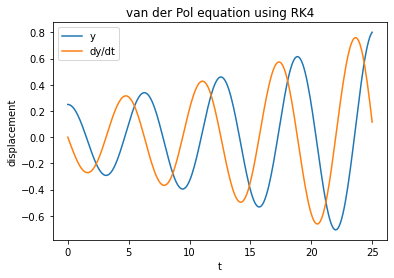

A small initial condition leads to a growing solution so the equilibrium is unstable.


In [4]:
#Include an uncommented version of the correct one of the lines below at the end of your solution:
#answer = "A small initial condition leads to a decaying solution so the equilibrium is stable."
answer = "A small initial condition leads to a growing solution so the equilibrium is unstable."
# YOUR CODE HERE
def rk_solve(f,y0,t,order=4):

    step_method = rk2_step # Temporary default value until rk4_step is implemented
    #####################
    # Specify the order #
    if 1 == order:
        step_method =  euler_step
    elif 2 == order:
        step_method = rk2_step
    elif 4 == order:
        step_method = rk4_step
    elif 4 != order:
        print("Requested order not in [1,2,4]. Using default order 4.")
    ######################
    # End of order spec. #
    # Start the solver   #
    ######################
    n = t.size
    m = y0.size #determine size of the dependent variable array
    y = [y0] #list to store 1D numpy array for each time
    for i in range(n-1):
        y_new = step_method(f,y[i],t[i],t[i+1]) #compute next step as before
        y.append(y_new)
        #NOTICE: For numpy array, would need loop to assign values into y one element at a time
        #for j in range(m): 
            #y[i+1,j] = y_new[j]
    return np.array(y)

def rk2_step(f,y,t0,t1):

    f0 = f(y,t0)
    h  = t1-t0
    
    #compute euler estimate for half step
    y1 = y + 0.5*h*f0
    t1 = t0 + 0.5*h
    
    #compute midstep rate estimate
    f1 = f(y1,t1)
    
    #take full step using midstep rate estimate 
    y_new = y + h*f1
    return y_new

def rk4_step(f,y,t0,t1):

    h = t1 - t0
    f1 = f( y, t0 )
    f2 = f( y + 0.5 * h * f1, t0 + 0.5 * h )
    f3 = f( y + 0.5 * h * f2, t0 + 0.5 * h )
    f4 = f( y + h * f3, t0 + h )
    y_new = y + h* ( f1 + 2.0 * ( f2 + f3 ) + f4 ) / 6.0
    return y_new
eta = 0.1
rhs = lambda y,t: np.array([y[1], eta*(1-(y[0]**2))*y[1]-y[0]])
y0 = np.array([0.25, 0])
steps = int(25/0.1)
t =np.linspace(0,25,steps+1)
y = rk_solve(rhs, y0, t, 4)
plt.plot(t, y.T[0], label="y")
plt.plot(t, y.T[1], label="dy/dt")
plt.xlabel("t")
plt.ylabel("displacement")
plt.legend()
plt.title("van der Pol equation using RK4")
plt.show()
print(answer)

2. Unlike the linear case, an unstable equilibrium does not necessarily mean that solutions blow up and become unbounded. Compute and plot the solution over the longer interval $t \in [0., 75.]$. Include an uncommented version of the most appropriate description of the large time behavior (from the choices given below).

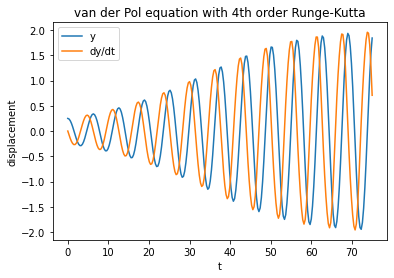

A balance is achieved and the solution approaches a sinusoidal oscillation with amplitude 2.


In [5]:
# answer = "The solution continures to grow towards unboundedness."
# answer = "After the initial growth, the solution decays back toward zero."
answer = "A balance is achieved and the solution approaches a sinusoidal oscillation with amplitude 2."

# YOUR CODE HERE
epsilon = 0.1
rhs = lambda y,t: np.array([y[1], epsilon*(1 - (y[0]**2))*y[1] - y[0]])
y0 = np.array([0.25, 0])
steps = int(25/0.1)
t = np.linspace(0,75,steps+1)
y = rk_solve(rhs, y0, t, 4)
plt.plot(t, y.T[0], label="y")
plt.plot(t, y.T[1], label="dy/dt")
plt.legend()
plt.xlabel("t")
plt.ylabel("displacement")
plt.title("van der Pol equation with 4th order Runge-Kutta")
plt.show()
print(answer)

3. Implement an ODE solver based on the second order Adams-Bashforth-Moulton predictor-corrector method and use it to compute a a solution to the van der Pol equation for verification by comparison with RK4 result.

3a. Implement a function to take a single predictor corrector step:

In [6]:
def pc_step(f, y_prev, y, t, h, tol=1.e-6, verbose = False):
    """
    compute a single step of Adams-Bashforth-Moulton 2nd-order solver for systems of 1st order ODEs
    
    Args:
        f: name of right-hand side function that gives rate of change of y
        y_prev: numpy array of float values of dependent variable at previous step
        y: numpy array of float values of dependent variable at current step
        t: float current value of independent variable
        h: float stepsize
        tol: float tolerance; accept value when |predicted-corrected| < tol
        
    Returns:
        y: 1D numpy array of float values of dependent variable at next step
    """
    # YOUR CODE HERE
    predicted = y + (h/2)*(3*f(y, t) - f(y_prev, t - h))
    corrected = y + (h/2)*(f(predicted, t + h) + f(y, t))
    while abs(predicted[0] - corrected[0]) > tol:
        predicted = corrected
        corrected = y + (h/2)*(f(predicted, t + h) + f(y, t))
    return corrected

3b. Implement a function to compute predictor-corrector solution on a grid of values of independent variable.

In [7]:
def pc_solve(f,y0,t):
    """
    Adams-Bashforth-Moulton s2nd-order solver for systems of 1st order ODEs
    
    Args:
        f: name of right-hand side function that gives rate of change of y
        y0: numpy array of initial float values of dependent variable
        t: numpy array of float values of independent variable
        
    Returns:
        y: 2D numpy array of float values of dependent variable
    """
    # YOUR CODE HERE
    h = t[1] - t[0]
    RK4 = rk_solve(rhs, y0, t, 4)
    y = np.zeros((len(t), len(y0))) 
    y[0] = y0
    y[1] = RK4[1] 
    for i in range(1, len(t) - 1):
        ybase = pc_step(f, y[i - 1], y[i], t[i], h, tol=1.e-6, verbose = False)
        for j in range(len(y0)):
            y[i + 1, j] = ybase[j]
    return y

3c. Compute the predictor-corrector solution of the same problem treated in problem 2. Plot the Runge-Kutta and predictor-corrector solutions together. Compute the norm of the difference between the two solutions and confirm that it is small (compared to the length of the solution interval).

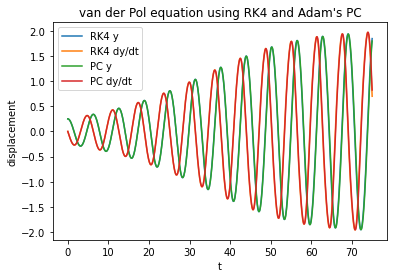

In [8]:
# YOUR CODE HERE
epsilon = 0.1
rhs = lambda y,t: np.array([y[1], epsilon*(1 - (y[0]**2))*y[1] - y[0]])
y0 = np.array([0.25, 0])
steps = int(75/0.1)
t = np.linspace(0,75,steps+1)
y = rk_solve(rhs, y0, t, 4)
y_pcsolve = pc_solve(rhs,y0,t)

plt.plot(t, y.T[0], label="RK4 y")
plt.plot(t, y.T[1], label="RK4 dy/dt")

plt.plot(t, y_pcsolve.T[0], label="PC y")
plt.plot(t, y_pcsolve.T[1], label="PC dy/dt")


plt.legend()
plt.xlabel("t")
plt.ylabel("displacement")
plt.title("van der Pol equation using RK4 and Adam's PC")
plt.show()

In [ ]:
y_RK4 = rk4_solve(f,y0,t)
y_PC = pc_solve(f,y0,t)
assert_(LA.norm(y_RK4-y_PC)/y_RK4.size<1e-2)

4. Now set the initial conditions to $y(0)=2, y'(0)=0$ (to start near the steady-state solution) and re-compute the same solution for different values of the parameter $\epsilon$.

3a. $\epsilon = 5.0$

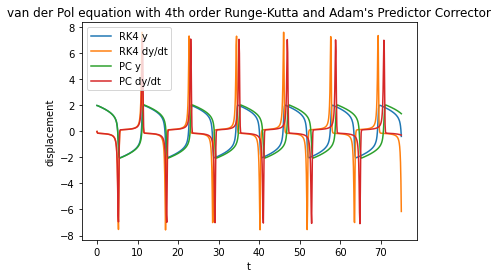

In [12]:
# YOUR CODE HERE
epsilon = 5
rhs = lambda y,t: np.array([y[1], epsilon*(1 - (y[0]**2))*y[1] - y[0]])
y0 = np.array([2, 0])
steps = int(75/0.1)
t = np.linspace(0,75,steps+1)
y = rk_solve(rhs, y0, t, 4)
y_pcsolve = pc_solve(rhs,y0,t)

plt.plot(t, y.T[0],label="RK4 y")
plt.plot(t, y.T[1],label="RK4 dy/dt")

plt.plot(t, y_pcsolve.T[0], label="PC y")
plt.plot(t, y_pcsolve.T[1], label="PC dy/dt")


plt.legend()
plt.xlabel("t")
plt.ylabel("displacement")
plt.title("van der Pol equation with 4th order Runge-Kutta and Adam's Predictor Corrector")
plt.show()

In [23]:
# Describe your results.
# YOUR CODE HERE
print('Both values oscilate uniformly')
print('The the values of y oscilated between  2 and -2 with considerable change every t=5')
print('The values of dy/dt oscilated between 7 and -7 with considerable change every t=5')

Both values oscilate uniformly
The the values of y oscilated between  2 and -2 with considerable change every t=5
The values of dy/dt oscilated between 7 and -7 with considerable change every t=5


3b. $\epsilon = 10.0$

<ipython-input-13-d9a5af028172>:3: RuntimeWarning: overflow encountered in double_scalars
  rhs = lambda y,t: np.array([y[1], epsilon*(1 - (y[0]**2))*y[1] - y[0]])
<ipython-input-4-5ca35e5d5e51>:56: RuntimeWarning: invalid value encountered in add
  y_new = y + h* ( f1 + 2.0 * ( f2 + f3 ) + f4 ) / 6.0
<ipython-input-13-d9a5af028172>:3: RuntimeWarning: invalid value encountered in double_scalars
  rhs = lambda y,t: np.array([y[1], epsilon*(1 - (y[0]**2))*y[1] - y[0]])


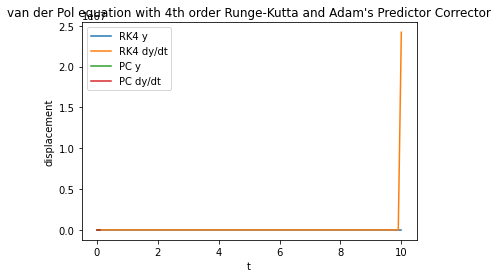

In [13]:
# YOUR CODE HERE
epsilon = 10
rhs = lambda y,t: np.array([y[1], epsilon*(1 - (y[0]**2))*y[1] - y[0]])
y0 = np.array([2, 0])
steps = int(75/0.1)
t = np.linspace(0,75,steps+1)
y = rk_solve(rhs, y0, t, 4)
y_pcsolve = pc_solve(rhs,y0,t)

plt.plot(t, y.T[0],label="RK4 y")
plt.plot(t, y.T[1],label="RK4 dy/dt")

plt.plot(t, y_pcsolve.T[0], label="PC y")
plt.plot(t, y_pcsolve.T[1], label="PC dy/dt")


plt.legend()
plt.xlabel("t")
plt.ylabel("displacement")
plt.title("van der Pol equation with 4th order Runge-Kutta and Adam's Predictor Corrector")
plt.show()

In [24]:
# Again describe your results.
# YOUR CODE HERE
print('runtime errors arrise when we increase the value of epsilon')
print('resulting in constant values of y and dy/dt')
print('y = 2 whereas dy/dt = 0')

runtime errors arrise when we increase the value of epsilon
resulting in constant values of y and dy/dt
y = 2 whereas dy/dt = 0


3c. Repeat 3b, but reduce the stepsize by a factor of 10.

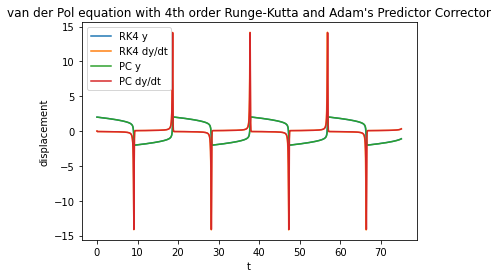

In [14]:
# YOUR CODE HERE
epsilon = 10
rhs = lambda y,t: np.array([y[1], epsilon*(1 - (y[0]**2))*y[1] - y[0]])
y0 = np.array([2, 0])
steps = int((75/0.01))
t = np.linspace(0,75,steps+1)
y = rk_solve(rhs, y0, t, 4)
y_pcsolve = pc_solve(rhs,y0,t)

plt.plot(t, y.T[0],label="RK4 y")
plt.plot(t, y.T[1],label="RK4 dy/dt")

plt.plot(t, y_pcsolve.T[0], label="PC y")
plt.plot(t, y_pcsolve.T[1], label="PC dy/dt")


plt.legend()
plt.xlabel("t")
plt.ylabel("displacement")
plt.title("van der Pol equation with 4th order Runge-Kutta and Adam's Predictor Corrector")
plt.show()

In [25]:
#Describe your results.
# YOUR CODE HERE
print('As decrease the step size decreases for the same (high) value of epsilon')
print('We avoid the runtime errors and get  oscilating graphs silimar to 3a')
print('The new plot y oscillates between 2.5 and -2.5 half of that in 3a similarly dy/dt between 14 and -14')
print('Whereas the considerable change is every t=10')

As decrease the step size decreases for the same (high) value of epsilon
We avoid the runtime errors and get  oscilating graphs silimar to 3a
The new plot y oscillates between 2.5 and -2.5 half of that in 3a similarly dy/dt between 14 and -14
Whereas the considerable change is every t=10


3d. With the reduced stepsize, try $\epsilon = 100$. Do you get a solution? If not, why not?

<ipython-input-15-7eee860c0e2f>:3: RuntimeWarning: overflow encountered in double_scalars
  rhs = lambda y,t: np.array([y[1], epsilon*(1 - (y[0]**2))*y[1] - y[0]])
<ipython-input-15-7eee860c0e2f>:3: RuntimeWarning: invalid value encountered in double_scalars
  rhs = lambda y,t: np.array([y[1], epsilon*(1 - (y[0]**2))*y[1] - y[0]])
<ipython-input-4-5ca35e5d5e51>:56: RuntimeWarning: invalid value encountered in add
  y_new = y + h* ( f1 + 2.0 * ( f2 + f3 ) + f4 ) / 6.0


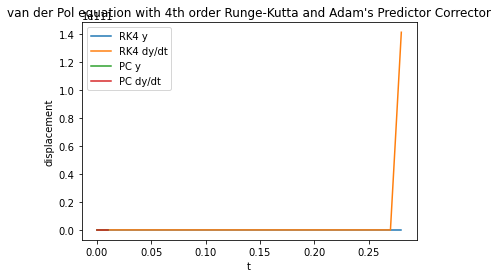

In [15]:
# YOUR CODE HERE
epsilon = 100
rhs = lambda y,t: np.array([y[1], epsilon*(1 - (y[0]**2))*y[1] - y[0]])
y0 = np.array([2, 0])
steps = int((75/0.01))
t = np.linspace(0,75,steps+1)
y = rk_solve(rhs, y0, t, 4)
y_pcsolve = pc_solve(rhs,y0,t)
plt.plot(t, y.T[0],label="RK4 y")
plt.plot(t, y.T[1],label="RK4 dy/dt")
plt.plot(t, y_pcsolve.T[0], label="PC y")
plt.plot(t, y_pcsolve.T[1], label="PC dy/dt")
plt.legend()
plt.xlabel("t")
plt.ylabel("displacement")
plt.title("van der Pol equation with 4th order Runge-Kutta and Adam's Predictor Corrector")
plt.show()

In [27]:
#Do you get a solution? If not, why not?
# YOUR CODE HERE
print('No, probably because for a high value of epsilon the stepside has to be decreased accordingly in order to get a solution')

No, probably because for a high value of epsilon the stepside has to be decreased accordingly in order to get a solution


4. One possible conclusion from problem 3 is that larger values of $\epsilon$ demand smaller and smaller stepsizes and computing the solution becmoes more and more expensive. Alternatively, maybe what is needed is to expend our computing effort more judicially. For $\epsilon >> 1$, the van der Pol equation is known to be "stiff" in the sense that there are two very different time scales in the problem: there are long periods of gradual decay or "relaxation" punctuated by a comparatively very rapid jump across $y=0$. The tough part of the computation is getting the solution to properly track through the jump, and we need to concentrate our efforts during the brief intervals when things are changing rapidly. There is nothing too challenging about computing the solution during the relaxation phase, but we are currently expending the bulk of our computing effort there.

This should provide motivation for a method with automated stepsize adjustment, and such methods are provided by the function`integrate.solve_ivp()` from the `scipy` package. The cell below shows how to use `solve_ivp()` to access the RK45 method (which has stepsize adjustment), compute and plot the solution, and print out the number of steps required.

Number of steps:  11582


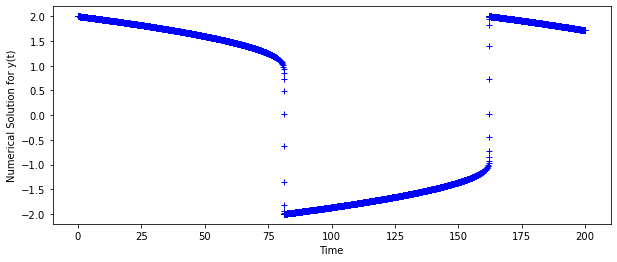

In [11]:
from scipy import integrate

tspan = np.array([0, 200],dtype=np.float64) # Span over which we are considering the problem
tstep = 10.
eps = 100.0

fig=plt.figure(figsize=(10,4))  # added to control plotsize

y0 = np.array([2.0, 0.])
sol = integrate.solve_ivp(lambda t, y : np.array([y[1], eps*(1-y[0]**2)*y[1] - y[0]]),
                          tspan,y0,max_step=tstep,method='RK45')
y = sol.y
t = sol.t
print("Number of steps: ", t.size)
plt.plot(t, y[0], 'b+')
plt.xlabel("Time")
plt.ylabel("Numerical Solution for y(t)")
plt.show()

Your tasks are as follows: 

- Look at the documentation for `solve_ivp()`.
- Find an alternative method specification that includes a predictor-corrector method with stepsize adjustment.
- Modify the code above the compute and plot the solution obtained using the method that includes predictor-corrector capability.
- Compare the number and distribution of steps used by your chosen method and by `RK45` above.

Number of steps:  300


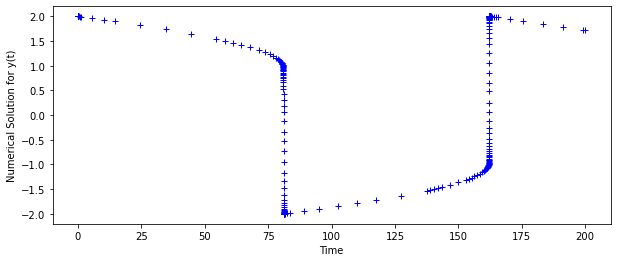

In [12]:
# enter modified code here to solve solve by alternate method and plot
# YOUR CODE HERE
fig=plt.figure(figsize=(10,4))  # added to control plotsize

y0 = np.array([2.0, 0.])
sol = integrate.solve_ivp(lambda t, y : np.array([y[1], eps*(1-y[0]**2)*y[1] - y[0]]),
                          tspan,y0,max_step=tstep,method='BDF')
y = sol.y
t = sol.t
print("Number of steps: ", t.size)
plt.plot(t, y[0], 'b+')
plt.xlabel("Time")
plt.ylabel("Numerical Solution for y(t)")
plt.show()

In [29]:
# describe/compare step count and distribution
# YOUR CODE HERE
print('The step count is considerably more when using RK45 as opposed to BDF')
print('In BDF the number of steps is 300 compared to 11582 when using the RK45')
print('In RK45 the steps are distributed mainly horizontally')
print('In BDF the steps are concentrated on the edges of the plot and there are more steps the virtically than RK45')

The step count is considerably more when using RK45 as opposed to BDF
In BDF the number of steps is 300 compared to 11582 when using the RK45
In RK45 the steps are distributed mainly horizontally
In BDF the steps are concentrated on the edges of the plot and there are more steps the virtically than RK45


5. Use the direct solve method to compute the first 3 eigenvalues and eigenvectors of a uniform beam that is cantilevered at both ends.

After non-dimensionalization, the normal displacement $w(x,t)$ of an Euler-Bernoulli beam is governed by the partial differential equation:
$$\frac{\partial^4 w}{dx^4} = -\frac{\partial^2 w}{dt^2}$$

Assuming a solution of the form $w(x,t) = T(x) T(t)$ and separating variables gives rise to a pair of ODEs, the first of which governs the temporal dependence: $$\frac{d^2T}{dt^2} + \omega^2 T = 0$$

The time dependence is therefore sinusoidal with angular frequency $\omega$, and the spatial dependence (mode shape) is governed by:

$\displaystyle{\frac{d^4Y}{dx^4} - \omega^2 Y = 0}$ with boundary conditions $Y(0)=Y'(0)=y(1)=Y'(1)=0$.

Applying separation of variables to the beam equation produces the following ODE:
$$\frac{d^4y}{dx^4} + \beta^4 y = 0$$ with boundary conditions $y(0)=y'(0)=y(1)=y'(1)=0$.

The goal of this problem is to compute the first 3 natural frequencies and mode shapes using the direct solve method.

Start by discretizing the problem using the simplest centered difference approximation for the $4^{th}$ derivative which has the coefficient stencil $[1,−4,6,−4,1]/h^4$.

Use a grid with about 50 pointsd and include two "non-interior" grid points at each side of the interval. Assign the value $0$ to the non-interior points to enforce the boundary conditions on both value and slope.

Construct the appropriate matrix and consider as an eigenvalue problem. Use an eigensolver from from `scipy` to compute the first 3 eigenvalues and eigenvectors.

a) Plot the first 3 eigenvectors (associated with the smallest eigenvalues) and comment on whether the eigenvectors are good representations of the exact mode shapes.

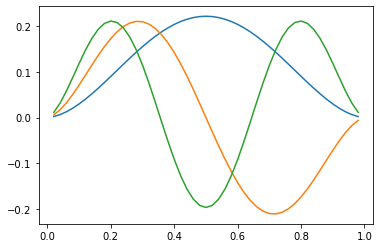

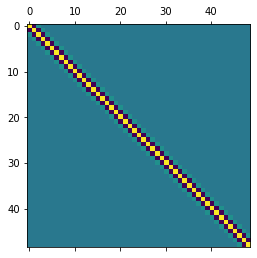

yes, the eigenvalues are a good representation of the exact modeshapes


In [30]:
# compute and plot eigenvectors
# YOUR CODE HERE
from scipy.sparse import diags
N = 50
L = 1
x = np.linspace(0,L,N+1)
x_interior =  x[1:-1]
dx = L/N
A = diags([1,-4,6,-4,1], [-2,-1, 0, 1,2], shape=(N-1,N-1)).toarray()
vals,vecs = LA.eigh(A)
plt.plot(x_interior,vecs.T[0])
plt.plot(x_interior,vecs.T[1])
plt.plot(x_interior,vecs.T[2])
plt.matshow(A)
plt.show()
print('yes, the eigenvalues are a good representation of the exact modeshapes')

5b) Convert the natural frequencies ($\omega$) corresponding to the eigenvalues, and compute an array `freq_rat` of the first 3 frequencies divided by the first (smallest) frequency. (Yes, the first entry should be one.)

In [14]:
#compute first 3 frequency ratios and store in array named `freq_rat`
# YOUR CODE HERE
from numpy import linalg as LA
vals,vecs = LA.eigh(A)
#np.sqrt(vals)/dx
omegas = np.sqrt(vals)/dx
omegas[0:3]
freq_rat = np.zeros(3)
for i in range(3):
    freq_rat[i] = omegas[i]/omegas[0]
print(freq_rat)

[1.         2.75468261 5.39325615]


In [ ]:
assert_(freq_rat[0] == 1.)